In [ ]:
#!pip install pandas matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

------------------------------------------------------------------------------------------------------------------------------

In [50]:
df2 = pd.read_csv("year_district_crimes.csv",header=None, names=['Year',"District", 'Cantidad'])


In [51]:
suma = df2["Cantidad"].sum()
print(suma)

7924036


In [52]:
df2= df2.dropna()

In [53]:
df2

,Year,District,Cantidad
0,2001,1.0,14861
1,2001,2.0,35407
2,2001,3.0,24312
3,2001,4.0,25121
4,2001,5.0,20007
...,...,...,...
533,2023,20.0,4452
534,2023,22.0,6676
535,2023,24.0,7350
536,2023,25.0,11136


In [54]:
df_max = pd.read_csv("most_crimes_in_district.csv", header=None, names=['Year', 'Cantidad'])
print(df_max)

    Year  Cantidad
0   2016     18654
1   2012     22724
2   2020     15056
3   2019     18720
4   2017     18069
5   2014     20671
6   2013     21956
7   2005     31353
8   2002     32100
9   2018     19275
10  2009     28639
11  2006     32270
12  2004     31404
13  2011     25384
14  2022     14812
15  2008     30859
16  2007     31107
17  2023     13575
18  2021     13957
19  2015     19535
20  2001     35407
21  2010     26531
22  2003     31709


In [55]:
# Combina los dos DataFrames en base al año y la cantidad máxima
result_df = pd.merge(df_max, df2, on=['Year', 'Cantidad'], how='left')

# Muestra el DataFrame resultante
print(result_df.sort_values(by='Year', ascending=True))

    Year  Cantidad  District
20  2001     35407       2.0
8   2002     32100       8.0
22  2003     31709       8.0
12  2004     31404       8.0
7   2005     31353       8.0
11  2006     32270       8.0
16  2007     31107       8.0
15  2008     30859       8.0
10  2009     28639       8.0
21  2010     26531       8.0
13  2011     25384       8.0
1   2012     22724       8.0
6   2013     21956      11.0
5   2014     20671      11.0
19  2015     19535      11.0
0   2016     18654      11.0
4   2017     18069      11.0
9   2018     19275      11.0
3   2019     18720      11.0
2   2020     15056      11.0
18  2021     13957      11.0
14  2022     14812       8.0
17  2023     13575       8.0


Que paso en 2013 que hizo que cambiara la tendencia de la comisaría que más crímenes atendía y que volvió a pasar en 2022 para volver a cambiar la tendencia 

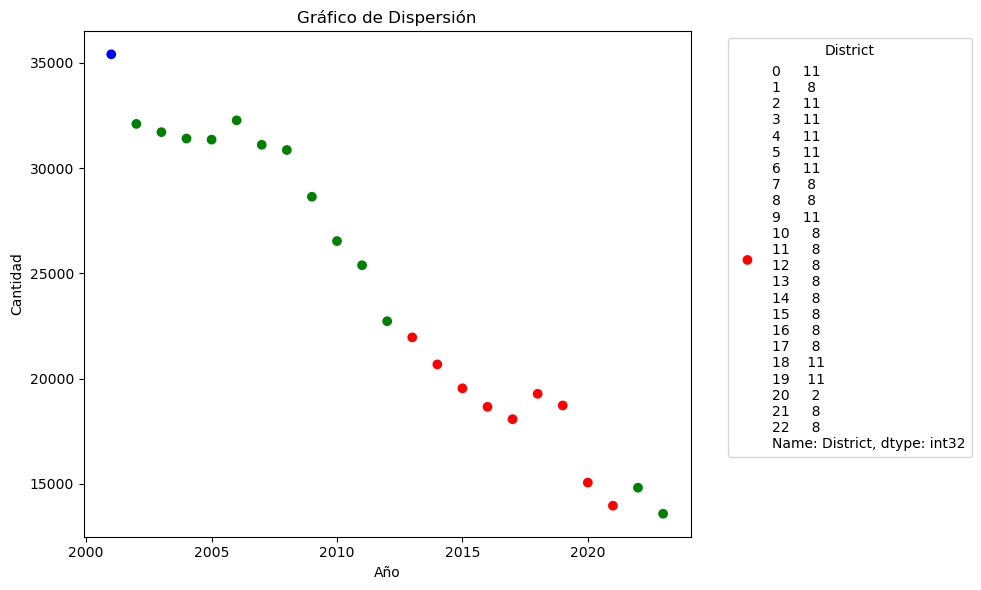

In [56]:
# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Colorear puntos por distrito
colors = {2.0: 'blue', 8.0: 'green', 11.0: 'red'}
scatter = plt.scatter(result_df['Year'], result_df['Cantidad'], c=result_df['District'].map(colors), label=result_df['District'].astype(int))

# Configuración del gráfico
plt.title('Gráfico de Dispersión')
plt.xlabel('Año')
plt.ylabel('Cantidad')

# Ajustar la posición de la leyenda y el espacio entre la leyenda y la gráfica
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir un ajuste para evitar que el gráfico se recorte
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [57]:
df_media1 = df2.groupby('District')['Cantidad'].mean().reset_index()
df_media1

,District,Cantidad
0,1.0,14011.478261
1,2.0,16337.217391
2,3.0,17467.217391
3,4.0,19557.347826
4,5.0,15241.608696
5,6.0,20151.347826
6,7.0,19834.130435
7,8.0,23137.260870
8,9.0,16810.043478
9,10.0,14841.695652


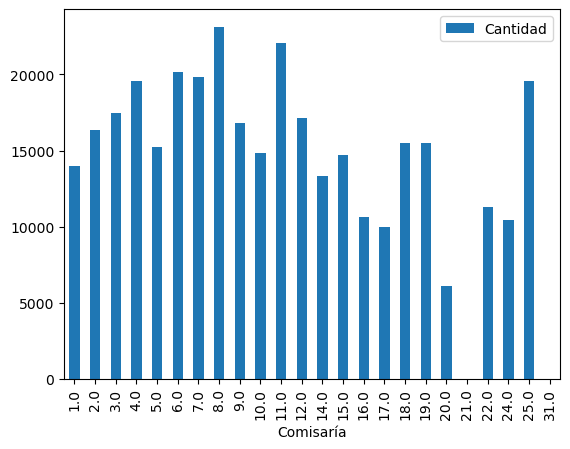

In [58]:
df_media1.plot(x='District', y='Cantidad',kind="bar")
plt.xlabel('Comisaría')
plt.show()

**Años de la pandemia:**

In [59]:
df_filtered = df2[df2['Year'] == 2019]

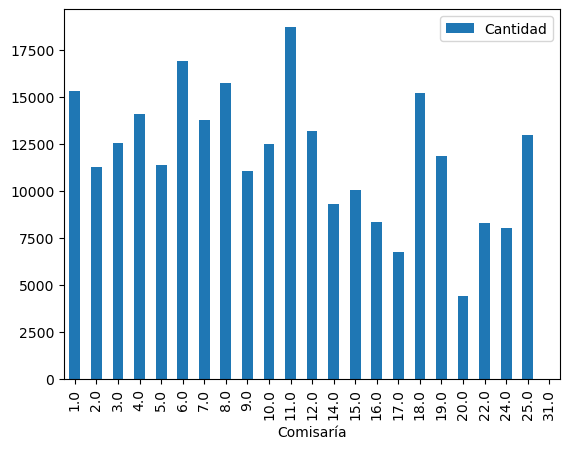

In [60]:
df_filtered.plot(x='District', y='Cantidad',kind="bar")
plt.xlabel('Comisaría')
plt.show()

In [46]:
df_filtered1 = df2[df2['Year'] == 2020]

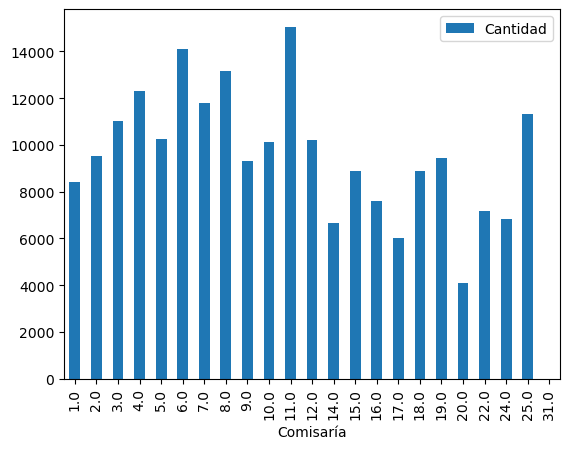

In [61]:
df_filtered1.plot(x='District', y='Cantidad',kind="bar")
plt.xlabel('Comisaría')
plt.show()

In [62]:
df_filtered = df2[df2['Year'].isin([2019, 2020])]
df_filtered

,Year,District,Cantidad
421,2019,1.0,15304
422,2019,2.0,11258
423,2019,3.0,12516
424,2019,4.0,14063
425,2019,5.0,11381
426,2019,6.0,16891
427,2019,7.0,13736
428,2019,8.0,15734
429,2019,9.0,11026
430,2019,10.0,12501


In [63]:
df_media = df_filtered.groupby('District')['Cantidad'].mean().reset_index()
df_media

,District,Cantidad
0,1.0,11858.0
1,2.0,10392.0
2,3.0,11776.0
3,4.0,13192.5
4,5.0,10825.5
5,6.0,15497.0
6,7.0,12758.0
7,8.0,14456.5
8,9.0,10159.5
9,10.0,11309.0


In [64]:
#Comparar media de la pandemia con media general
print(df_media1)

    District      Cantidad
0        1.0  14011.478261
1        2.0  16337.217391
2        3.0  17467.217391
3        4.0  19557.347826
4        5.0  15241.608696
5        6.0  20151.347826
6        7.0  19834.130435
7        8.0  23137.260870
8        9.0  16810.043478
9       10.0  14841.695652
10      11.0  22066.434783
11      12.0  17128.260870
12      14.0  13312.130435
13      15.0  14701.521739
14      16.0  10624.800000
15      17.0   9945.695652
16      18.0  15491.304348
17      19.0  15519.478261
18      20.0   6111.695652
19      21.0      2.000000
20      22.0  11279.043478
21      24.0  10437.478261
22      25.0  19579.217391
23      31.0     11.272727


In [65]:
merged_df = pd.merge(df_media, df_media1, on='District', suffixes=('_parcial', '_total'))
print(merged_df)

    District  Cantidad_parcial  Cantidad_total
0        1.0           11858.0    14011.478261
1        2.0           10392.0    16337.217391
2        3.0           11776.0    17467.217391
3        4.0           13192.5    19557.347826
4        5.0           10825.5    15241.608696
5        6.0           15497.0    20151.347826
6        7.0           12758.0    19834.130435
7        8.0           14456.5    23137.260870
8        9.0           10159.5    16810.043478
9       10.0           11309.0    14841.695652
10      11.0           16888.0    22066.434783
11      12.0           11697.0    17128.260870
12      14.0            7983.0    13312.130435
13      15.0            9460.0    14701.521739
14      16.0            7952.5    10624.800000
15      17.0            6397.5     9945.695652
16      18.0           12026.0    15491.304348
17      19.0           10635.5    15519.478261
18      20.0            4243.0     6111.695652
19      22.0            7720.0    11279.043478
20      24.0 

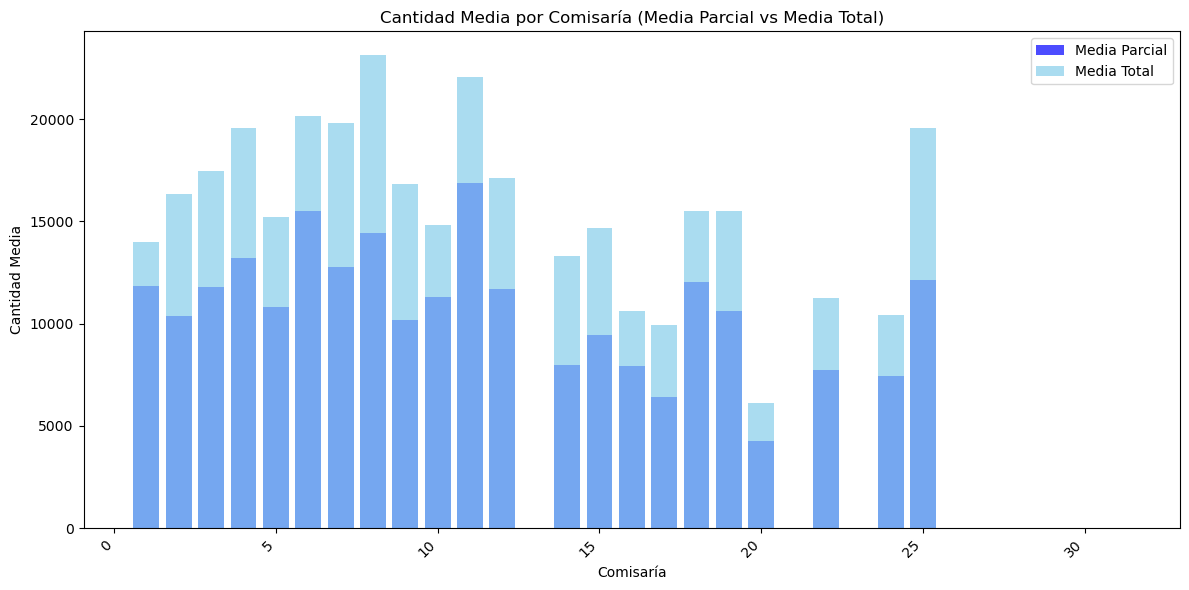

In [66]:

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Barra para la media parcial
ax.bar(merged_df['District'], merged_df['Cantidad_parcial'], label='Media Parcial', color='blue', alpha=0.7)

# Barra para la media total
ax.bar(merged_df['District'], merged_df['Cantidad_total'], label='Media Total', color='skyblue', alpha=0.7)

# Configurar leyendas y etiquetas
ax.legend()
ax.set_xlabel('Comisaría')
ax.set_ylabel('Cantidad Media')
ax.set_title('Cantidad Media por Comisaría (Media Parcial vs Media Total)')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

------------------------------------------------------------------------------------------------------------------------------